## Week 5 Workshop

The goal of the workshop this week is to work through a standard Data Science workflow: exploring data, building models, making predictions, evaluating results.    We will do this in the first instance using a simple linear least squares model and will look at two datasets.  The first is the standard Iris dataset describing flowers, the second is the AutoMPG dataset. 



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import sys
import warnings
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
if not sys.warnoptions:
    warnings.simplefilter("ignore")

The datasets we will use are available in a number of forms.  We'll use the versions bundled with the __seaborn__ plotting library since they load as Pandas dataframes.  


In [2]:
iris = sns.load_dataset('iris')

## Explore the dataset

Examine the data, what are the columns? How is the spread of variables - eg. is it normally distributed?  You might want to use the [sbs.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function which shows all variables plotted against each other as a matrix.  You should also look at the means and variances of each variable.  Get to know the Pandas methods (e.g. the `describe` method) for doing this.

Your goal is to get a good feel for the data you are dealing with. Eventually you will be trying to work out what techniques you might be able to use to work with the data. For now, just get used to exploring it.

In [3]:
display(iris.head())
print('columns name: ',list(iris.columns))
print('Shape of dataframe: ',iris.shape)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

columns name:  ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
Shape of dataframe:  (150, 5)


In [4]:
display(iris.describe())
iris.info()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


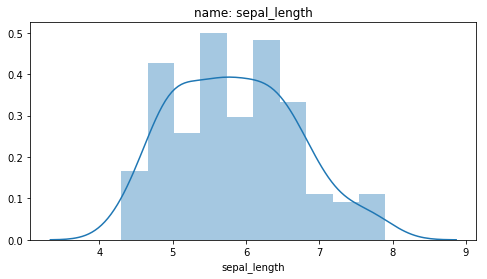

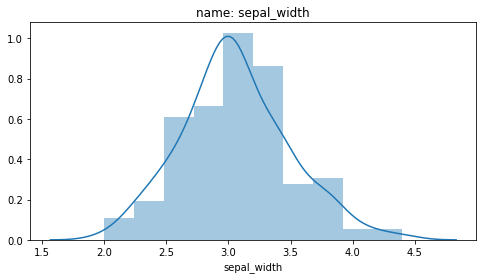

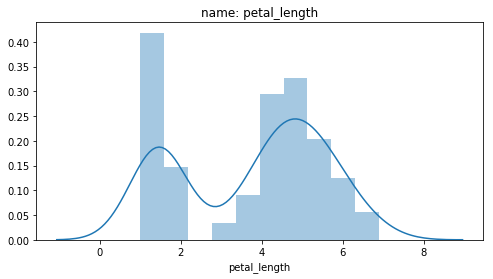

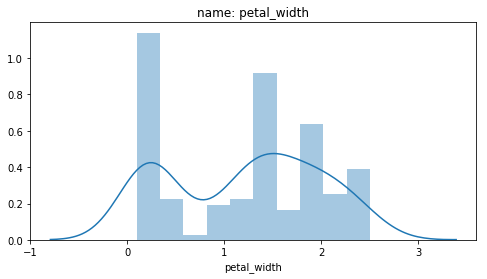

In [5]:
columns_data = list(iris.columns)
for i in columns_data[:-1]:
    plt.figure(figsize=(8,4))
    display(sns.distplot(iris[i],bins=10))
    plt.title(f"name: {i}")

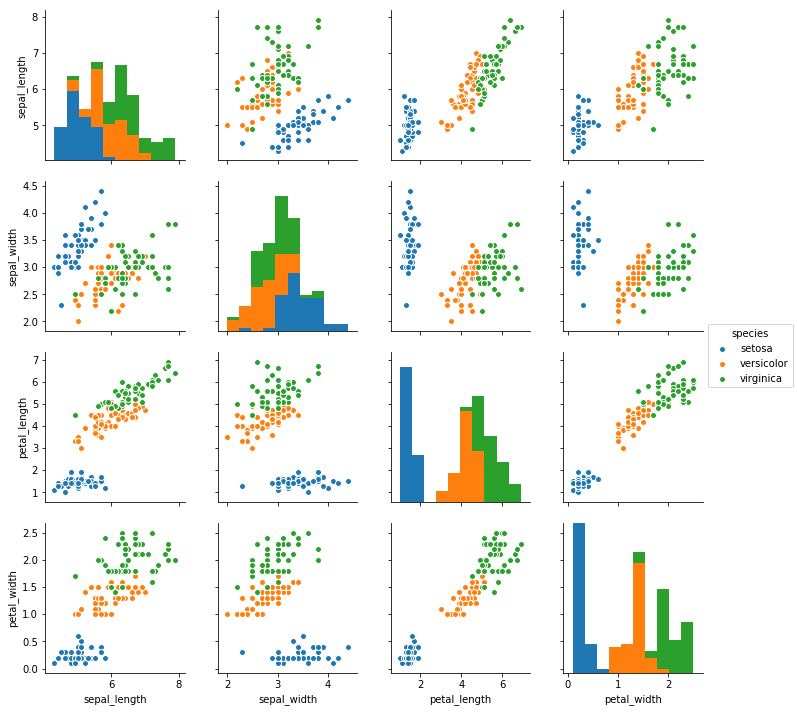

In [6]:
iris.head()
sns.pairplot(iris,hue='species')

from Above figures we can say that
### virginica species tends to have greater sepal length, petal length and width when compared to other species and setosa species tends to have greater sepal width when compared with other species

### sepal_length there is a linear relationship with petal length and width, petal_length there is a linear relationship with sepal length and petal width and petal_width there is a linear relationship with sepal length and petal length


## Linear Regression

A quick search will reveal many different ways to do linear regression in Python. We will use the [sklearn LinearRegression](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) function.  The sklearn module has many standard machine learning methods so it is a good one to get used to working with.  

Linear Regression involves fitting a model of the form:

> $y = O_1X + O_2$

Where $y$ is the (numerical) variable we're trying to predict, $X$ is the vector of input variables, $O_1$ is the array of model coefficients and $O_2$ is the intercept.  In the simple case when X is one-dimensional (one input variable) then this is the forumula for a straight line with gradient $O_1$.

We will first try to predict `petal_width` from `petal_length` in the iris data.  You should look at the plot of these two variables to see that they are roughly correlated.  Here is the code using `slkearn` to do this.   We first create a linear model, then select the data we will use to train it - note that `X` (the input) is a one-column pandas dataframe while `y` (the output) is a Series.  The `fit` method is used to train the model.  The result is a set of coefficients (in this case just one) and an intercept.  


y = x * [0.41575542] + -0.3630755213190291


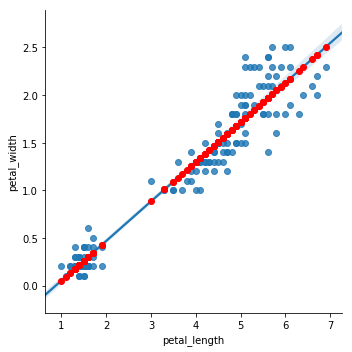

In [7]:
reg = linear_model.LinearRegression()
X = iris[['petal_length']]
y = iris['petal_width']
reg.fit(X, y)
predicted=reg.predict(X)
print("y = x *", reg.coef_, "+", reg.intercept_)
sns.lmplot('petal_length','petal_width',data=iris)
plt.plot(X['petal_length'],predicted,'o',c='r')

We can now use the `predict` method to predict the value of `petal_width` from some values of `petal_length`:

In [8]:
reg.predict(X[:3])

array([0.21898206, 0.21898206, 0.17740652])

Prediction in this case is just using the formual $y = x * O_1 + O_2$ - confirm this is the case by evaluating some sample values from `petal_length` (use `reg.coef_` and `reg.intercept_`).

In [9]:
print(f"value of {X[:3]}")
print(f"use in the linear regression model and get petal_width {reg.predict(X[:3])} which is nearly same with the original value {y[:3].values}")

value of    petal_length
0           1.4
1           1.4
2           1.3
use in the linear regression model and get petal_width [0.21898206 0.21898206 0.17740652] which is nearly same with the original value [0.2 0.2 0.2]


## Evaluating the model

How well does this model fit the data? We can measure the _mean squared error_ which is based on the difference between the real and predicted values of `petal_width` (mean of the squared differences).  Another measure is $R^2$ which measures the amount of variance in the data that is explained by the model.  Smaller MSE is better.  $R^2$ close to 1 is better.

Note that here I need to convert the output Series (`y`) to an `np.array`, this is because the sklearn library really works with numpy datastructures rather than pandas Series and Dataframes. I could have used [sklearn.metrics.mean_squared_error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) here but I wanted to show you that this is just a simple calculation on the results.

In [10]:
predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 0.04206730919499318
R Squared: 0.9271098389904927


## More Input Variables

Linear regression can work with more input variables, in this case the formula $y = x * O_1 + O_2$ becomes a matrix expression with $x$ and $O_1$ being vectors rather than scalars.  The code is almost exactly the same but we select two columns for the input array $X$.  Here we add `sepal_length`.  Note that the coefficients in the model is now a vector of two values:

In [11]:
reg = linear_model.LinearRegression()
X = iris[['petal_length', 'sepal_length']]
y = iris['petal_width']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)
predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print("MSE:", mse)
print("R Squared:", r2)

y = x * [ 0.44937611 -0.08221782] + -0.00899597269816943
MSE: 0.040962085264089815
R Squared: 0.9290248640257687


You can test the model in the same way as before.  Did the model get better? 

In [12]:
reg1 = linear_model.LinearRegression()
X1 = iris[['petal_length', 'sepal_length','sepal_width']]
y1 = iris['petal_width']
reg.fit(X1, y1)
print("y = x *", reg.coef_, "+", reg.intercept_)
predicted1 = reg.predict(X1)
mse_1 = ((np.array(y1)-predicted1)**2).sum()/len(y1)
r2_1 = r2_score(y1, predicted1)
print("MSE:", mse_1)
print("R Squared:", r2_1)

y = x * [ 0.52408311 -0.20726607  0.22282854] + -0.24030738911226113
MSE: 0.035868651138184555
R Squared: 0.9378502736046809


## Training and Testing Data

What we have done so far is to train and test the model on the same data. This is not good practice as we have no idea how good the model would be on new data.   Better practice is to split the data into two sets - training and testing data.  We build a model on the training data and test it on the test data.  

Sklearn provides a function [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to do this common task.  It returns two arrays of data. Here we ask for 20% of the data in the test set. 

In [50]:
train, test = train_test_split(iris, test_size=0.2)
print(train.shape)
print(test.shape)
x_train = train[['petal_length', 'sepal_length','sepal_width']]
y_train = train['petal_width']
x_test = test[['petal_length', 'sepal_length','sepal_width']]
y_test = test['petal_width']

(120, 8)
(30, 8)


In [51]:
print(f" train dataset row:{x_train.shape[0]} and columns:{x_train.shape[1]}")
print(f" test dataset row:{x_test.shape[0]} and columns:{x_test.shape[1]}")

 train dataset row:120 and columns:3
 test dataset row:30 and columns:3


You can now repeat the above procedure but this time train the model on the training data and evaluate on the test data.  Do the MSE and $R^2$ values change? 

**This is your checkpoint for this week**

**You have to report MSE and $R^2$ values on the training and test set. Also, provide your interpretation of results. Based on the values on training and testing data, comment whether model is overfitting?**

In [52]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)
predicted = reg.predict(x_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("R Squared:", r2)

y = x * [ 0.53233906 -0.22700557  0.22816991] + -0.16823617483190811
MSE: 0.03456212027552911
R Squared: 0.935011891509326


In [53]:
print(f"original value {y_test[:3].values} predicted value {reg.predict(x_test[:3])}")

original value [1.  0.1 1.8] predicted value [0.99426055 0.1719215  2.01411974]


###### In the simple testing model where feature x is the petal_length and y is petal_width and apply the Linear regression model we got MSE: 0.04206730919499318 R Squared: 0.9271098389904927 after we add more features to x (petal_length, sepal_length, sepal_width) and then apply Linear regression model the MSE: 0.035868651138184555 R Squared: 0.9378502736046809 From the MSE and R sqared we can say that the when we add features more features in model we get better performance of the model. So we choose random data sample for training and testing using train_test_split and then apply the Linear regression model we got a MSE: 0.03456212027552911 R Squared: 0.935011891509326 and from the value we can say that there is the much less variance notice on the train and test data so this model is not overfitted.


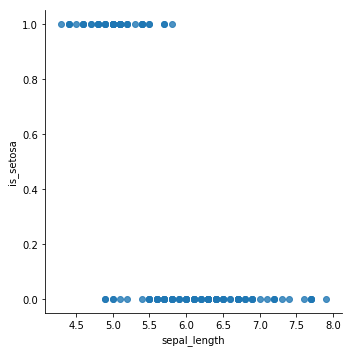

In [55]:
iris['is_setosa'] = (iris['species']=='setosa').astype('int64')
iris['is_versicolor'] = (iris['species']=='versicolor').astype('int64')
iris['is_virginica'] = (iris['species']=='virginica').astype('int64')
iris.sort_values('sepal_length')
sns.lmplot('sepal_length','is_setosa',iris,fit_reg=False)

In [56]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species  is_setosa  \
0           5.1          3.5           1.4          0.2  setosa          1   
1           4.9          3.0           1.4          0.2  setosa          1   
2           4.7          3.2           1.3          0.2  setosa          1   
3           4.6          3.1           1.5          0.2  setosa          1   
4           5.0          3.6           1.4          0.2  setosa          1   

   is_versicolor  is_virginica  
0              0             0  
1              0             0  
2              0             0  
3              0             0  
4              0             0

In [57]:
Feature_cols=['sepal_length']
X_seto =iris[Feature_cols]
y_seto =iris['is_setosa']
model = linear_model.LinearRegression()
model.fit(X_seto,y_seto)
print('y = ',model.coef_,'* X + ',model.intercept_)

y =  [-0.40978124] * X +  2.7278217321087754


(Text(0.5,0,'sepal_length'), Text(0,0.5,'predicted is_setosa'))

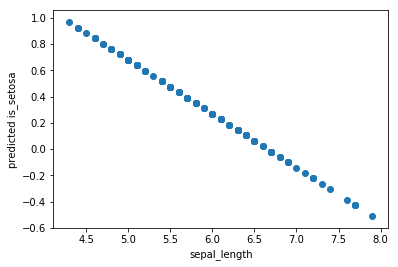

In [58]:
predicted_seto = model.predict(X_seto)
plt.scatter(X_seto,predicted_seto)
plt.xlabel('sepal_length'),plt.ylabel('predicted is_setosa')

(Text(0.5,0,'sepal_length'), Text(0,0.5,'is_setosa'))

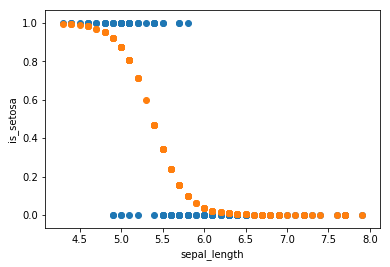

In [59]:
from sklearn.linear_model import LogisticRegression

feature_cols = ['sepal_length']
x_logi =iris[feature_cols]
y_logi = iris['is_setosa']
logreg = LogisticRegression(C=1e9)
logreg.fit(x_logi,y_logi)
probs = logreg.predict_proba(x_logi)[:,1]
plt.scatter(x_logi,y_logi),plt.scatter(x_logi,probs)
plt.xlabel('sepal_length'),plt.ylabel('is_setosa')

# Auto MPG Dataset

This dataset contains details of different US cars with measures of various physical features and the miles-per-gallon (mpg) measure of fuel consumption.   The goal is to predict MPG from other features. 

- explore this dataset, look at summary statistics, plot the data get an idea of how the variables vary together
- split the data into training and testing sets
- use a least squares linear model to predict MPG from the **weight** of the car, evaluate the result
- add other features to the model, evaluate the results. What is the most accurate model? 
- Evaluate model performance in terms of MSE and $R^2$ scores. Comment on whether adding more features improves model's performance.

In [60]:
mpg = sns.load_dataset('mpg')

In [61]:
mpg.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [62]:
print(mpg.columns)
mpg.describe()

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')


mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000

In [63]:
#check null value
mpg.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [64]:
mpg = mpg.fillna(mpg.horsepower.mean())
mpg.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [65]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

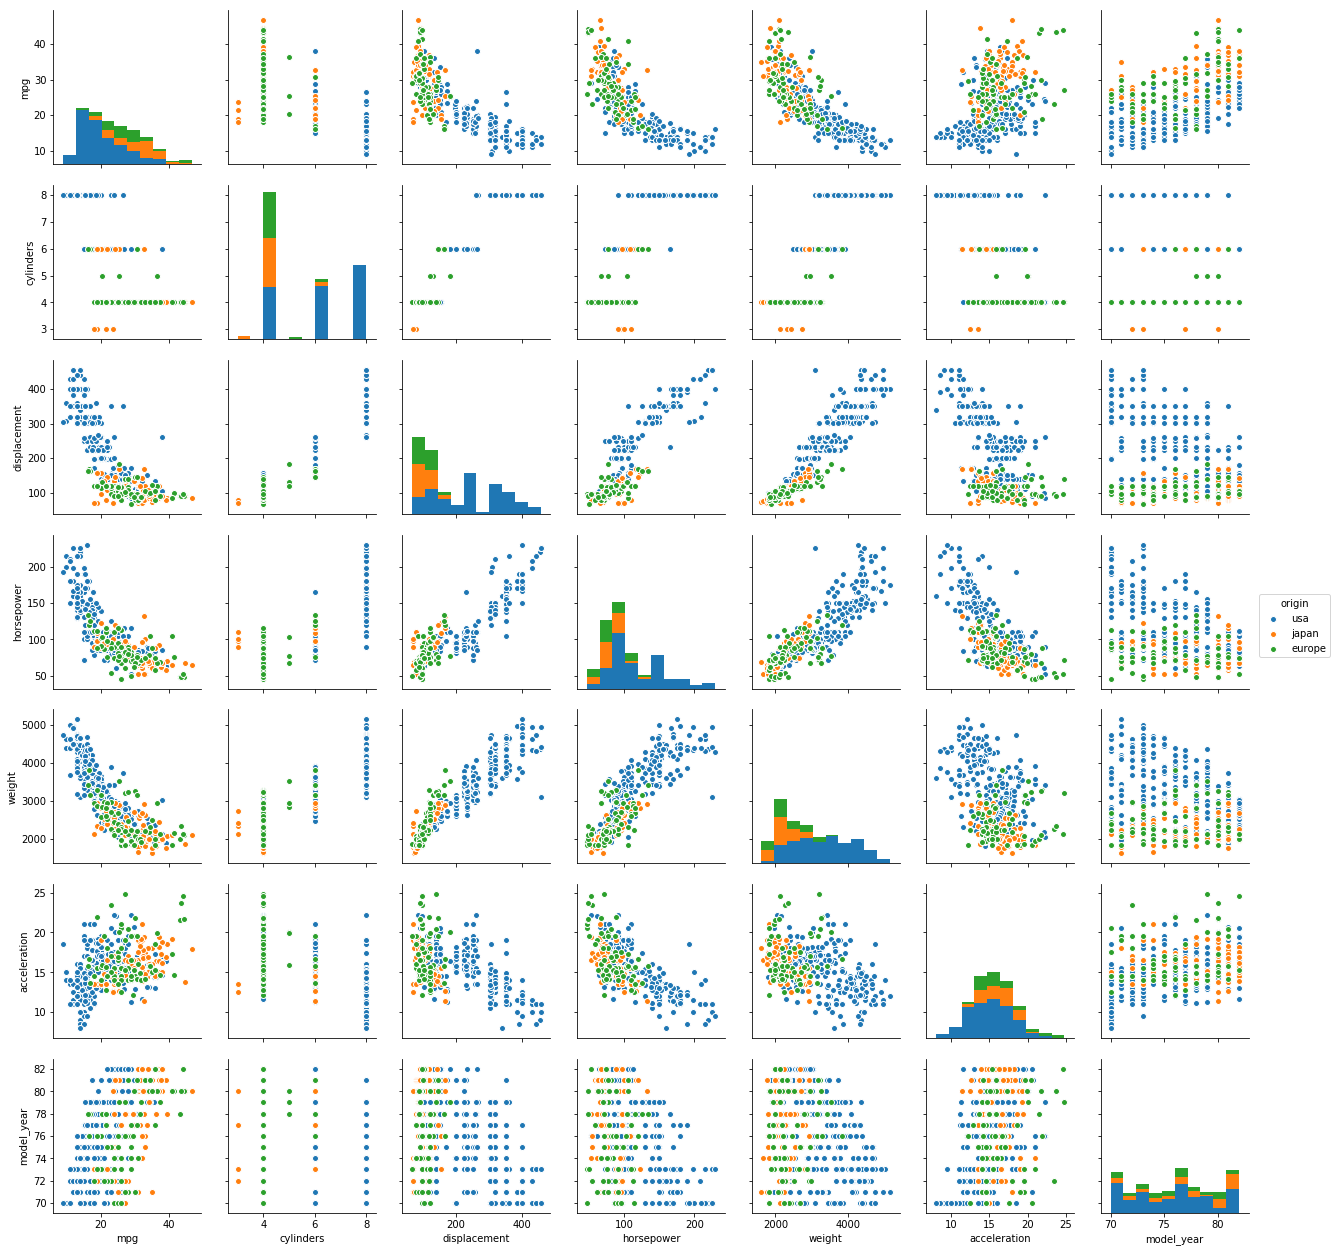

In [66]:
sns.pairplot(mpg,hue='origin')

In [67]:
train, test = train_test_split(mpg, test_size=0.2, random_state =7)
print(test.shape)
print(train.shape)

(80, 9)
(318, 9)


In [68]:
mpg_X = train[['weight','cylinders','displacement','horsepower','acceleration']]
mpg_y = train['mpg']
mpg_X1 = test[['weight','cylinders','displacement','horsepower','acceleration']]
mpg_y1 = test['mpg']

In [69]:
reg = linear_model.LinearRegression()
reg.fit(mpg_X,mpg_y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-0.00519997 -0.72136741 -0.00312715 -0.02336773  0.04202571] + 45.476595617822156


In [70]:
predicted_mpg = reg.predict(mpg_X1)
mse = ((np.array(mpg_y1)-predicted_mpg)**2).sum()/len(mpg_y1)
r2 = r2_score(mpg_y1, predicted_mpg)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 19.510117069674557
R Squared: 0.5896741370695956
